In [18]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense, Rescaling,Dropout
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential


In [2]:
from google.colab import files 
uploaded = files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [3]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [4]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

Text(0.5, 1.0, 'Label')

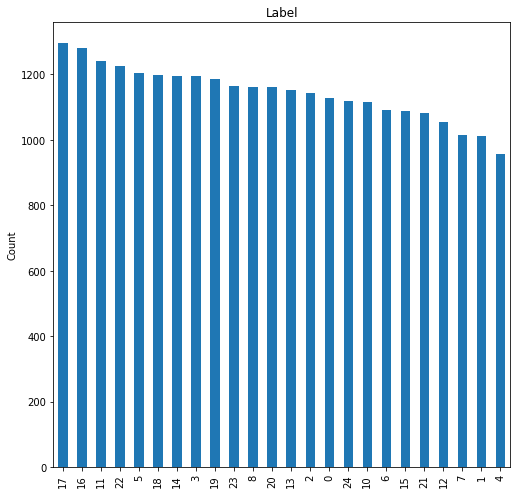

In [6]:
#checking balanced dataset

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train.label.value_counts().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [12]:
train_data =np.array(train,dtype='float32')
test_data =np.array(test,dtype='float32')

X_train = train_data[:,1:]/255
X_test = test_data[:,1:]/255

y_train = np.array(pd.get_dummies(train.label))
y_test = np.array(pd.get_dummies(test.label))




24

In [13]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))


In [21]:
model = Sequential([
                    Conv2D(32,3, input_shape=(28,28,1),activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.3),
                    Conv2D(64,3,activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.2),
                    Conv2D(128,3,activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.2),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(24,activation='softmax')




])

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [23]:
history = model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
215/215 [==============================] - 28s 126ms/step - loss: 2.2590 - accuracy: 0.3031 - val_loss: 1.1484 - val_accuracy: 0.6400
Epoch 2/10
215/215 [==============================] - 27s 126ms/step - loss: 0.8726 - accuracy: 0.7036 - val_loss: 0.6351 - val_accuracy: 0.7747
Epoch 3/10
215/215 [==============================] - 27s 126ms/step - loss: 0.5126 - accuracy: 0.8279 - val_loss: 0.4647 - val_accuracy: 0.8358
Epoch 4/10
215/215 [==============================] - 27s 126ms/step - loss: 0.3389 - accuracy: 0.8860 - val_loss: 0.3624 - val_accuracy: 0.8760
Epoch 5/10
215/215 [==============================] - 27s 126ms/step - loss: 0.2377 - accuracy: 0.9194 - val_loss: 0.2959 - val_accuracy: 0.8942
Epoch 6/10
215/215 [==============================] - 27s 125ms/step - loss: 0.1715 - accuracy: 0.9451 - val_loss: 0.2923 - val_accuracy: 0.9041
Epoch 7/10
215/215 [==============================] - 27s 126ms/step - loss: 0.1285 - accuracy: 0.9587 - val_loss: 0.2567 - val_ac

In [25]:
_,acc =model.evaluate(X_test,y_test)
print(f'Model accuracy: {acc}')

225/225 [==============================] - 2s 10ms/step - loss: 0.2429 - accuracy: 0.9385
Model accuracy: 0.9385108947753906


In [33]:
y_pred = model.predict(X_test)
y_pred.shape

(7172, 24)

In [32]:
y_pred2 = np.argmax(y_pred, axis=1)
y_pred2.shape

(7172,)

In [35]:
y_test2 = np.argmax(y_test,axis=1)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       331
           1       1.00      1.00      1.00       432
           2       0.90      0.98      0.94       310
           3       0.97      0.92      0.95       245
           4       0.90      0.96      0.93       498
           5       1.00      1.00      1.00       247
           6       0.93      0.85      0.89       348
           7       0.92      0.95      0.94       436
           8       0.87      0.93      0.90       288
           9       1.00      0.93      0.96       331
          10       0.94      0.95      0.95       209
          11       0.97      0.98      0.97       394
          12       1.00      0.93      0.96       291
          13       0.97      0.86      0.91       246
          14       1.00      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16       0.81      0.85      0.83       144
          17       0.79    